# Laboratorio 1: Clasificación de pacientes con diabetes

El objetivo de este laboratorio es que puedan aplicar las técnicas aprendidas en la [Clase Práctica 1](https://colab.research.google.com/drive/16xzoEZ8oNvtmgDMMOdtNMAdyltz7MWWZ?authuser=2&hl=es) para resolver la clasificar pacientes con diabetes. 

En particular, trabajaremos con el *Pima Indians Diabetes Dataset*. Este corpus tiene como objetivo predecir si un paciente tiene o no tiene diabetes en base a una serie de diagnósticos registrados. La muestra consiste en datos de mujeres de al menos 21 años de descendencia indígena del grupo Pima. Específicamente, existen varios atributos médicos y una variable objetivo, la columna **Outcome**. Esta columna alcanza un valor igual a 1 cuando la paciente posee diabetes, mientras que es 0 cuando no posee la enfermedad. 

Los resultados esperados son que puedan realizar un flujo clásico al momento de crear modelos de aprendizaje supervisado. Como mínimo se espera que se cumplan los siguientes objetivos:

1. Análisis exploratorio del dataset.
2. Aplicar los modelos aprendidos en clases.
3. Análisis de los resultados obtenidos, de manera cuantitativa como cualitativa.


**Librerías que les podrían ser útiles**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv
import os
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# Análisis exploratorio

Partamos por leer el dataset que se encuentra en el archivo `diabetes.csv`

In [3]:
# Respuesta
df = pd.read_csv("https://raw.githubusercontent.com/fvillena/biocompu/2022/data/diabetes.csv")

¿Cuántas instancias y cuántos atributos contiene el dataset?

In [5]:
# Respuesta
df.shape

(768, 9)

¿Cuáles son los nombres de los atributos (columnas)?

In [10]:
# Respuesta1
df["Outcome"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

In [9]:
# Respuesta2
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

¿Cuáles son los tipos de datos presentes en nuestro dataset?

In [11]:
# Respuesta
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


¿Hay valores nulos en nuestro dataset?

In [14]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Respuesta
value = df.isnull().values.any()
print(value)

False


¿Cuál es la frecuencia de ejemplos en la variable objetivo **Outcome**?

In [17]:
# Respuesta
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
set(df["Outcome"])

{0, 1}

In [20]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Para ejercitar el uso de filtros y consultar en dataframes, responder la siguiente pregunta. ¿Cuántos pacientes mayores a 40 años padecen de diabetes?

In [21]:
# Respuesta
df[(df["Age"]>40)&(df["Outcome"]==1)].shape[0]

102

Para ver si existen outliers en nuestro dataset, realice un Boxplot de los siguientes atributos en el dataset: Age, BMI, Glucose, BloodPressure.

<Axes: >

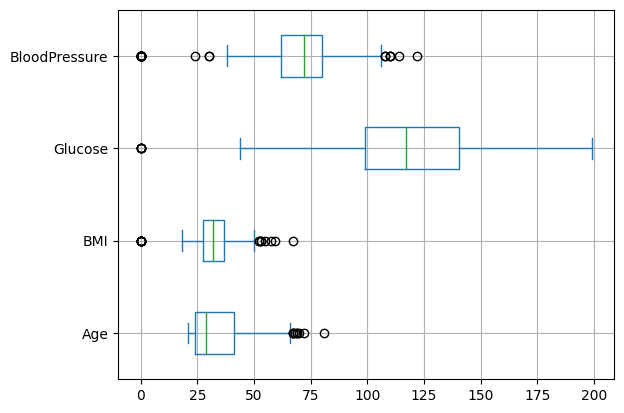

In [24]:
# Respuesta
df[["Age", "BMI", "Glucose", "BloodPressure"]].plot.box(vert=False, grid=True)

Veamos si existe alguna relación lineal entre distintos pares de atributos. Realice un scatter plot entre las variables Insulin y SkinThickness.

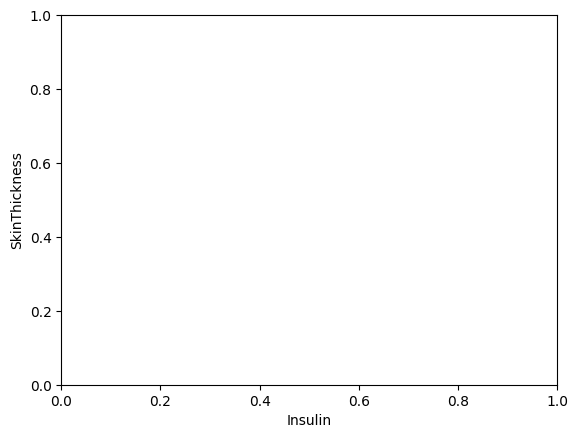

In [25]:
# Respuesta
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.show()

Graficar la matriz de correlación entre todas las variables del dataset

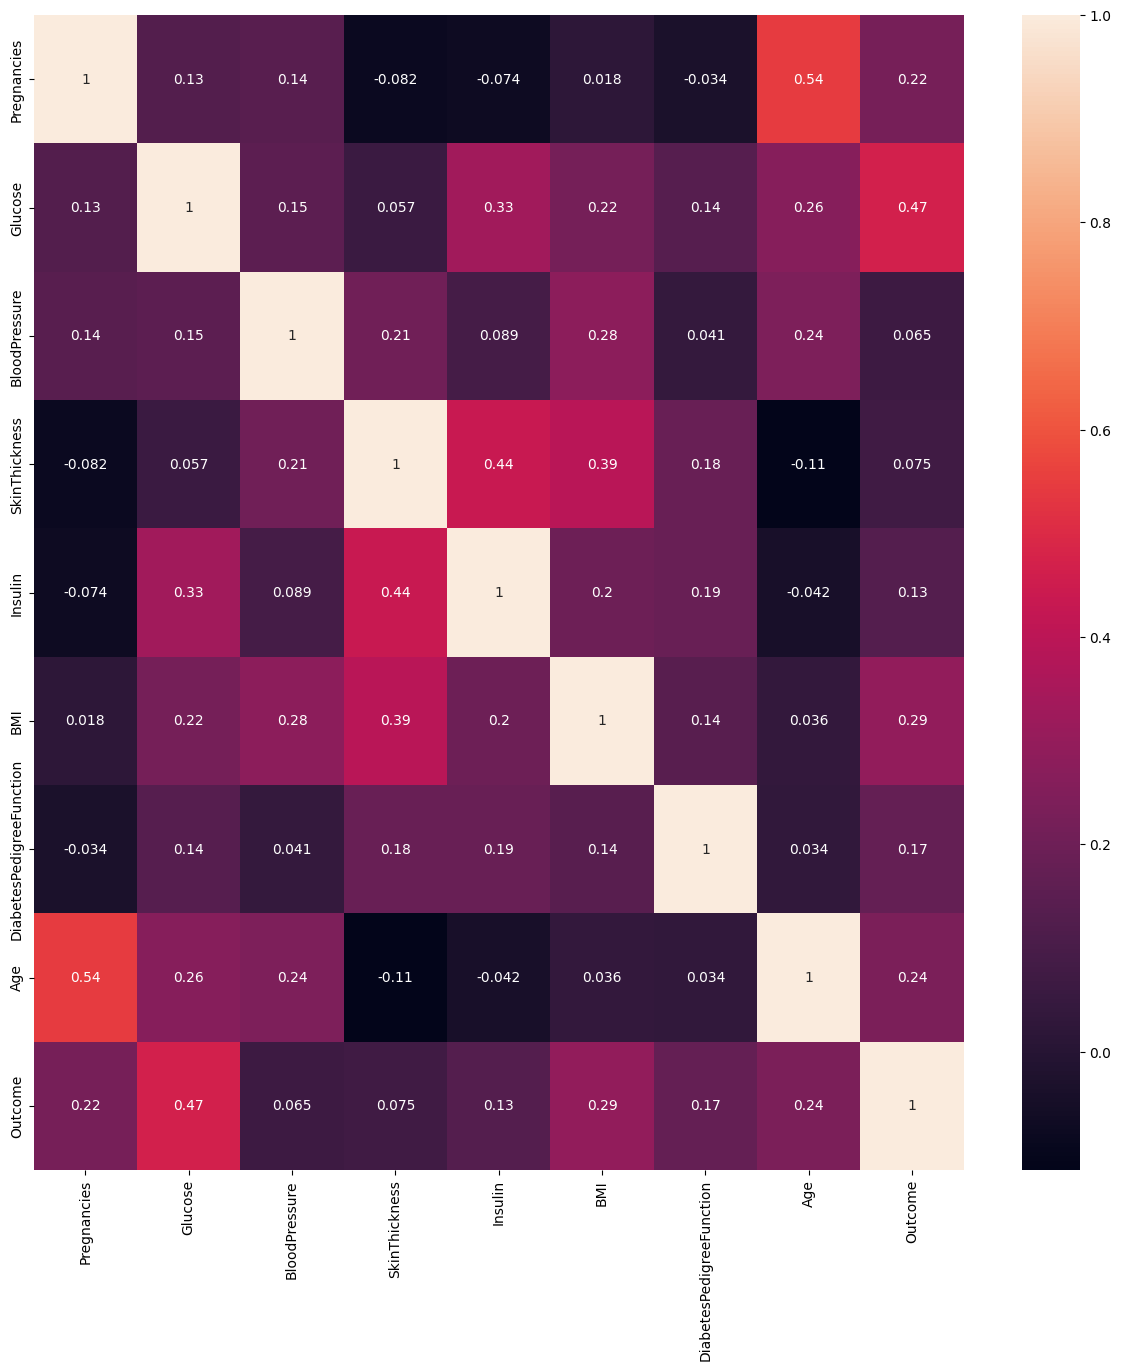

In [26]:
# Respuesta
corr=df.corr()
features=corr.index
plt.figure(figsize=(15,15))
ax=sns.heatmap(df[features].corr(),annot=True)

# Entrenamiento del modelo

Ejecute el siguiente bloque de código para separar los ejemplos `x` de las etiquetas `y`

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

Separe los datos en conjunto de entrenamiento y de testeo

In [ ]:
# Respuesta

Defina un modelo

In [ ]:
# Respuesta

Con el método `fit` entrenar el modelo

In [ ]:
# Respuesta

Obtener predicciones sobre el conjunto de testing

In [ ]:
# Respuesta

Obtener la métrica accuracy


In [ ]:
# Respuesta

# Análisis de resultados

> **Aquí va el análisis de los resultados obtenidos** 